## Table of Contents
* [General Info](#general-information)
* [Libraries Used](#libraries-used)
* [Data-Analysis](#data-Analysis)
* [Model Building](#model-building)
* [Model Evaluation](#model-evaluation)

<a name="general-information"></a>

# Bike sharing Regression Analysis

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


<a name="libraries-used"></a>
## Libraries Used
* NumPy: For numerical computations.
* Pandas: For data manipulation and analysis.
* Matplotlib: For creating visualizations.
* Seaborn: For statistical data visualization.
* Calendar: For date functions
* Warnings: To suppress warning messages.
* sklearn: Multiple functions to buling model using liner regression
* statsmodels: For statistical computationsject.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

<a name="reading-and-understading-data"></a>
## Reading and Understanding the Data

In [2]:
# Reading the Dataset
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the number is nulls's in the dataset and there are none
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# There are 730 rows in the Dataset
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Extracting Year and Month from dteday
df['year'] = pd.to_datetime(df['dteday'],format="mixed",dayfirst=True).dt.year
df['month'] = pd.to_datetime(df['dteday'],format='mixed',dayfirst=True).dt.month


df = df.drop(['yr','mnth'],axis=1)

<a name="data-Analysis"></a>
## Data Analysis

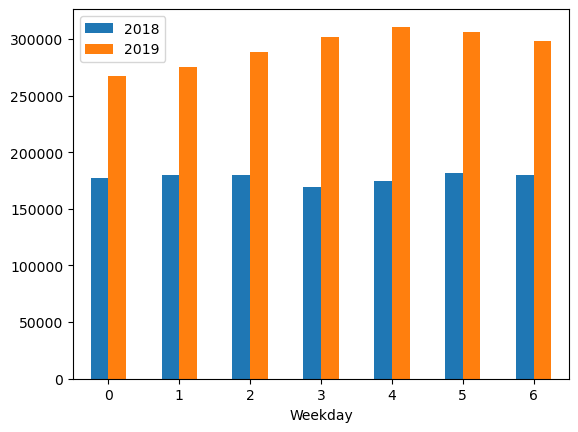

In [9]:
# Trend of Sales by Year and Weekday 
tempdf = pd.pivot_table(data=df,index=['weekday'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'Weekday': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})
tempdataframe.plot(x="Weekday", y=["2018", "2019"], kind="bar", rot=0)
plt.show()

#### 2019 has seen more sales compared to 2018

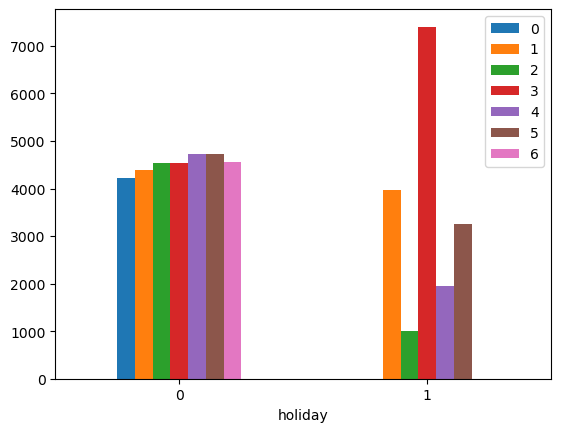

In [10]:
tempdf = pd.pivot_table(data=df,index=['holiday'],columns='weekday',values='cnt',aggfunc='mean')
tempdataframe = pd.DataFrame({'holiday': tempdf.index,'0':tempdf[0],'1':tempdf[1],'2':tempdf[2],'3':tempdf[3],'4':tempdf[4],'5':tempdf[5],'6':tempdf[6],})
tempdataframe.plot(x="holiday", y=["0", "1","2","3","4","5","6"], kind="bar", rot=0)
plt.show()

#### There is NO much impact on Sales on Holidays expect if it falls on Wednesday

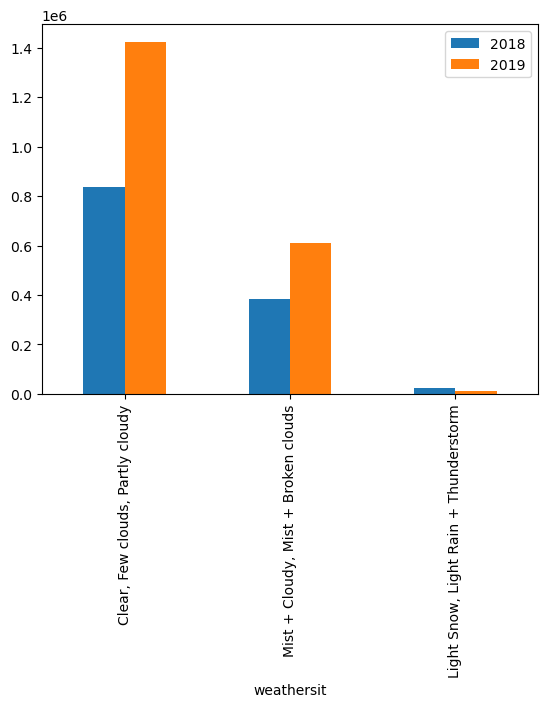

In [11]:
tempdf = pd.pivot_table(data=df,index=['weathersit'],columns='year',values='cnt',aggfunc='sum')

tempdataframe = pd.DataFrame({'weathersit': tempdf.index,'2018':tempdf[2018],'2019':tempdf[2019]})

tempdataframe['weathersit'] = tempdataframe['weathersit'].astype(str)

tempdataframe[['weathersit']] = tempdataframe[['weathersit']].apply(lambda x: x.map({'1':"Clear, Few clouds, Partly cloudy",'2':"Mist + Cloudy, Mist + Broken clouds",'3':'Light Snow, Light Rain + Thunderstorm'}))

tempdataframe.plot(x="weathersit", y=["2018", "2019"], kind="bar", rot=90)
plt.show()

####  Weather is playing a key role in the Bikes Rented. "Clear, Few clouds, Partly cloudy" are seeing the highest numbers. There is NO data for " Heavy Rain + Ice Pallets" which could mean no Bikes are taken these days

In [12]:
df['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [13]:
bins = [0,5, 10,15, 20, 25, 30, 36]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-36']
df['temp-binned'] = pd.cut(df['temp'], bins=bins, labels=labels)

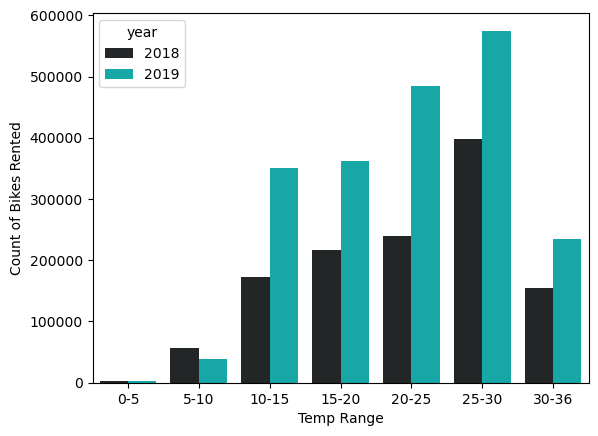

In [14]:
tempdataframe = df.groupby(['temp-binned','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='temp-binned',y='cnt',hue='year',color='c')
plt.xlabel("Temp Range")
plt.ylabel("Count of Bikes Rented")
plt.show()

#### Temperature is playing a major role on the count of bikes being rented. During days when temperature is between 20 and 30, the rentals are highest

In [15]:
df=df.drop('temp-binned',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  year        730 non-null    int32  
 15  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(9), object(1)
memory usage: 85.7+ KB


In [17]:
#dropping columns instant and  dteday 
#dteday: the month and year are already captured in other cols. Hence dteday makes no sense
#instantL
df = df.drop(['instant','dteday'],axis=1)

In [18]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


<Axes: xlabel='month', ylabel='cnt'>

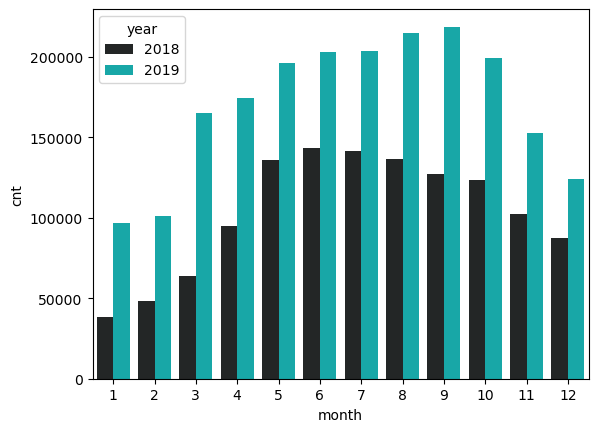

In [19]:
tempdataframe = df.groupby(['month','year'])['cnt'].sum().reset_index()
sns.barplot(tempdataframe,x='month',y='cnt',hue='year',color='c')

#### Months from May to October see high number of bike rentals

<Axes: xlabel='season', ylabel='cnt'>

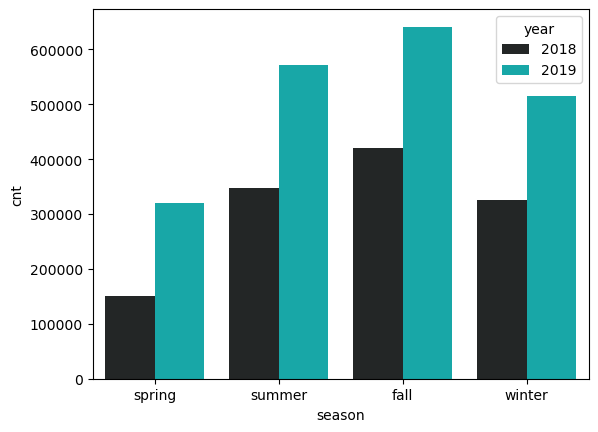

In [20]:
tempdataframe = df.groupby(['season','year'])['cnt'].sum().reset_index()
tempdataframe[['season']] = tempdataframe[['season']].apply(lambda x: x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
,
sns.barplot(tempdataframe,x='season',y='cnt',hue='year',color='c')

#### Fall and Summer see the highest Bike Rentals

In [21]:
# Dropping casual and registered as they are already contained in cnt. Cnt is also our target variable
df=df.drop(['casual','registered'],axis=1)

##### Replace categorical data values based on dict

In [22]:
df['season'] = df['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' })
df['weathersit']  = df['weathersit'].replace({ 1: 'Sunny', 2: 'Cloudy', 3: 'Rainy', 4: 'Stormy' })

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    object 
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  year        730 non-null    int32  
 11  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 62.9+ KB


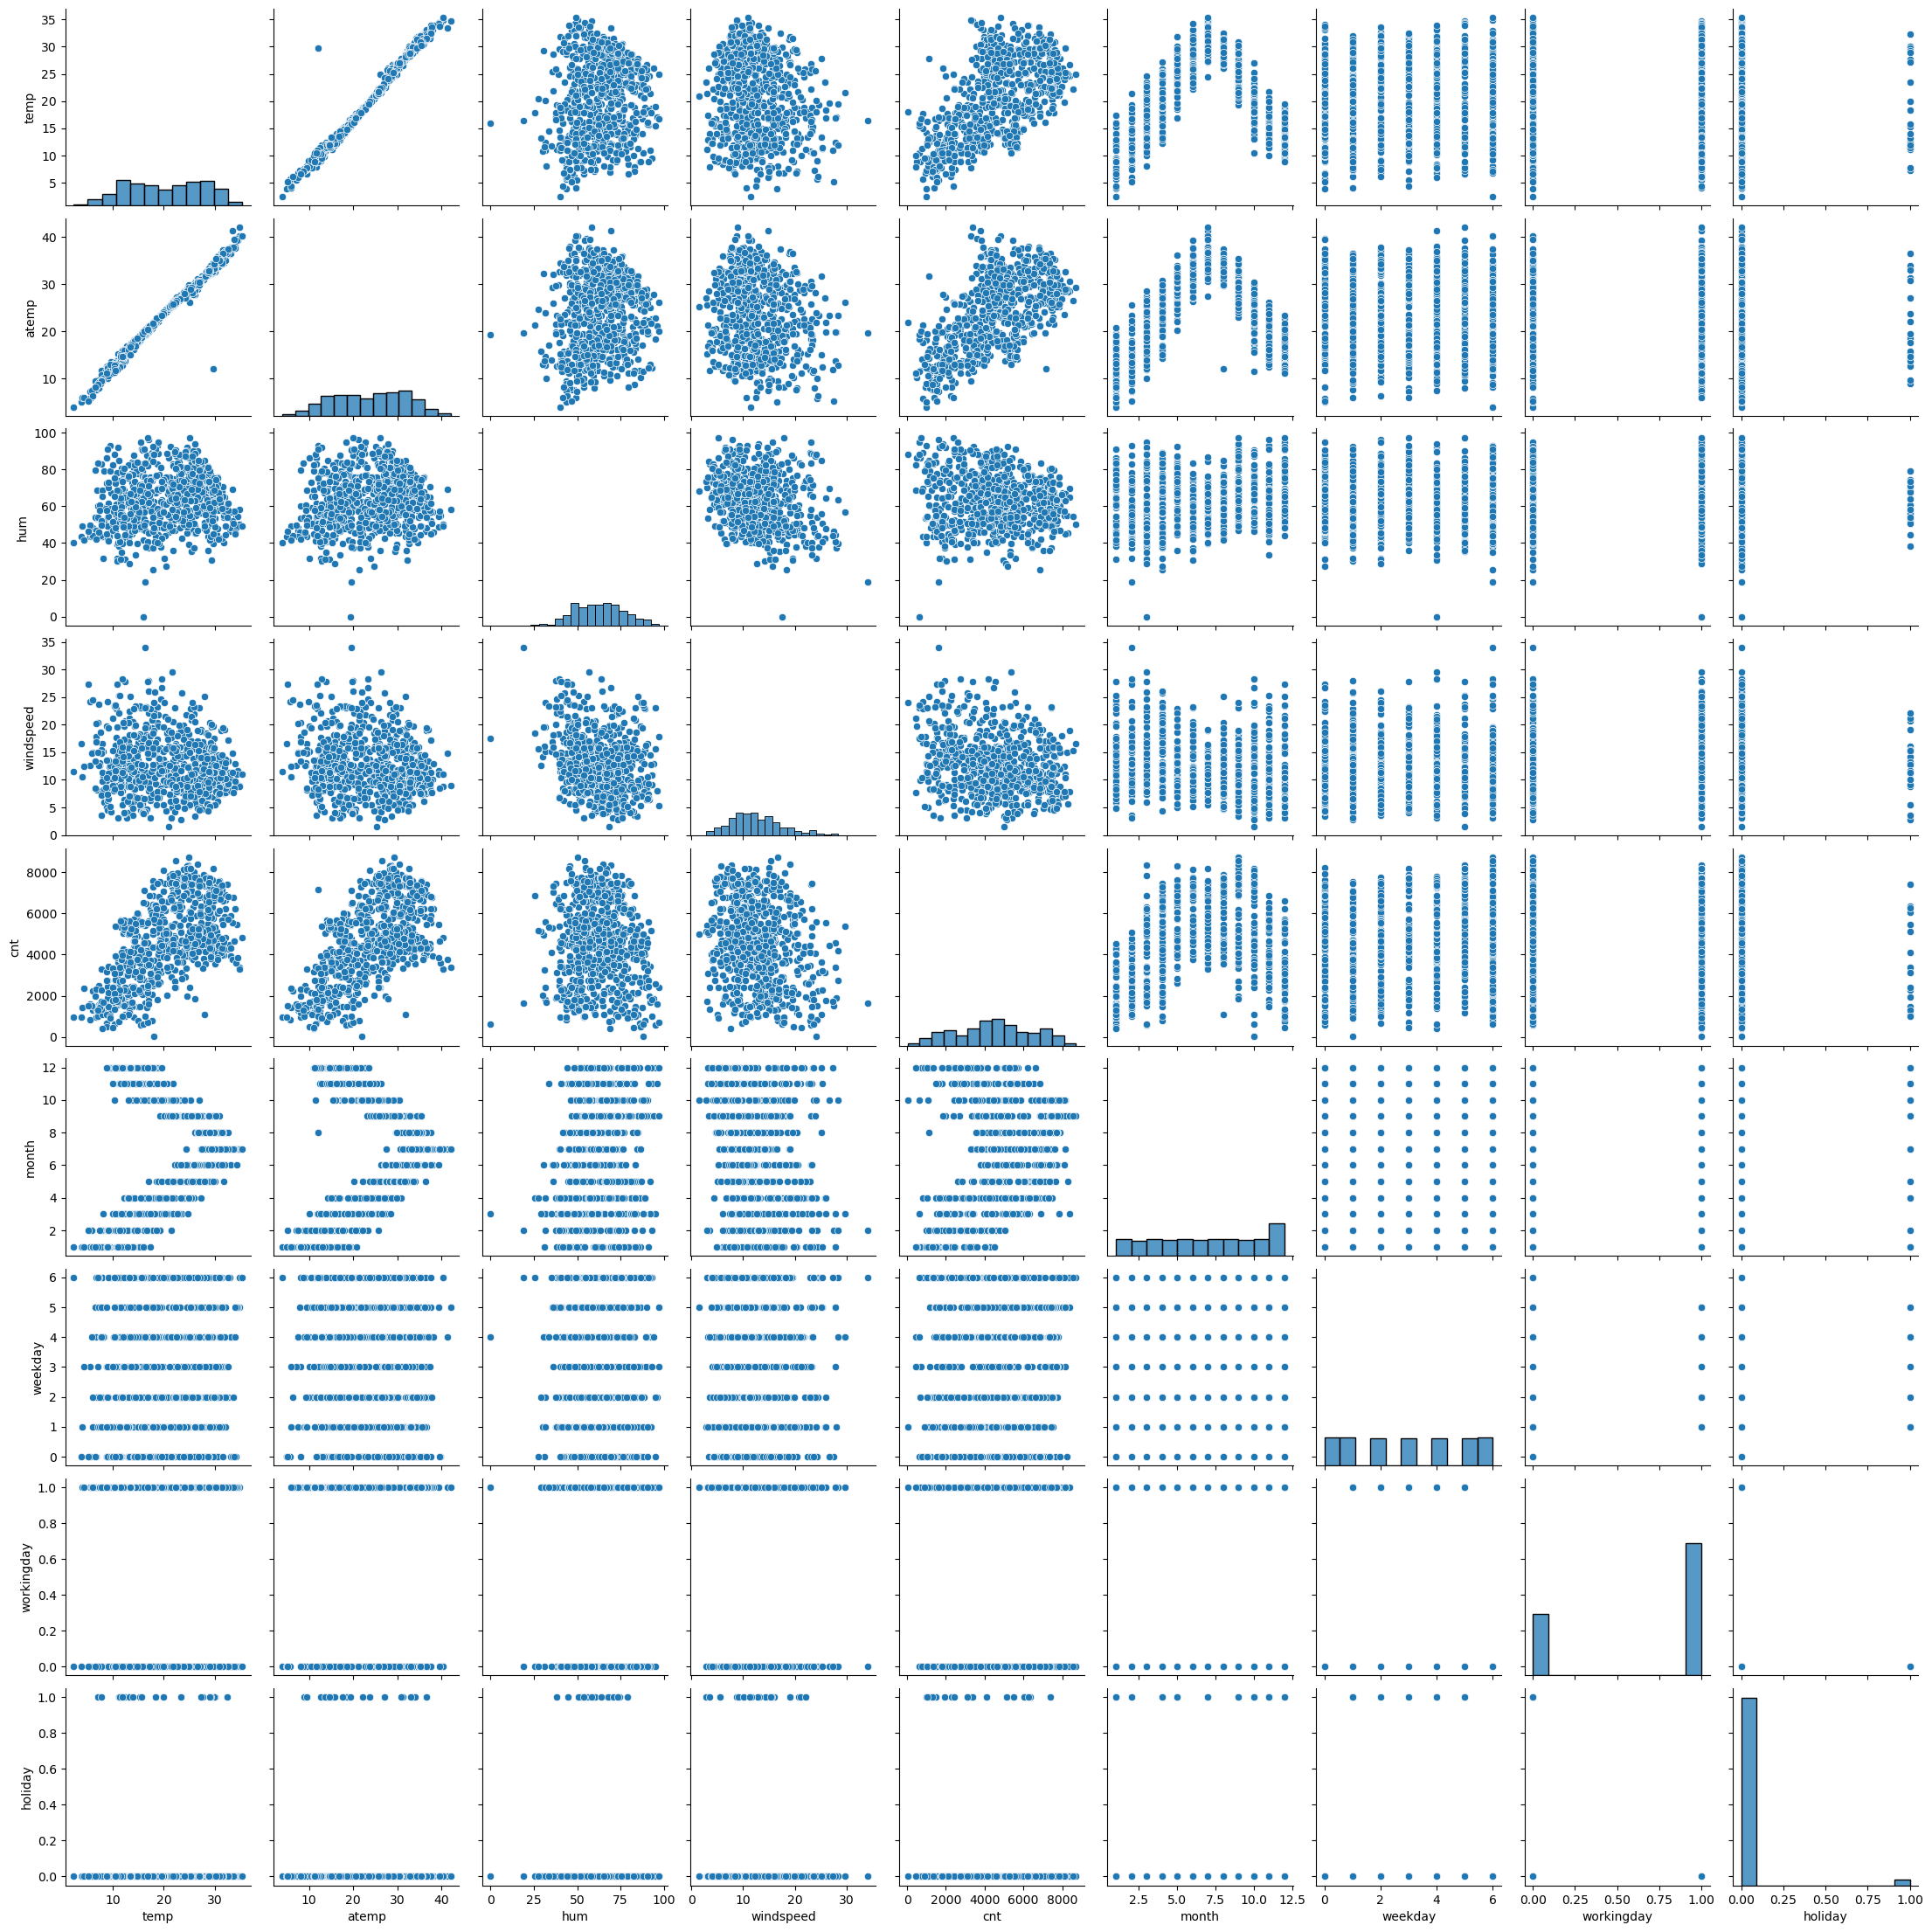

In [24]:
num_variables=['temp','atemp','hum','windspeed','cnt','month','weekday','workingday','holiday']
sns.pairplot(data = df, vars=num_variables)
plt.show()

Positive correlation between 'temp' and 'atemp'  & 'cnt' with independent variables 'temp', 'atemp'

In [25]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,Spring,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,Spring,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,Spring,0,1,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,Spring,0,2,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,Spring,0,3,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    object 
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  year        730 non-null    int32  
 11  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 62.9+ KB


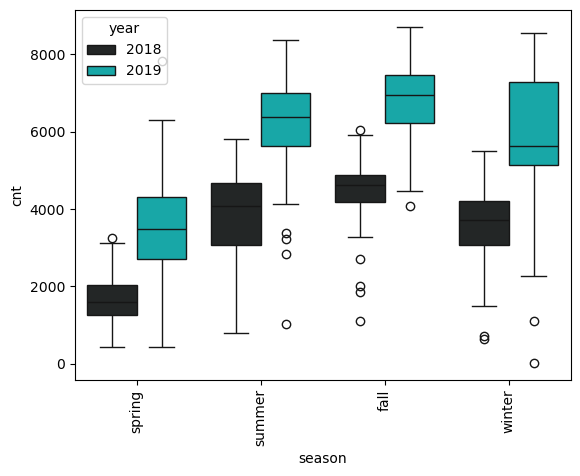

In [27]:
sns.boxplot(data=df,y='cnt',x='season',hue='year',color='c')


plt.xticks([0,1,2,3] ,['spring', 'summer', 'fall','winter'],rotation=90)

plt.show()

#### Summer and Fall see the highest bike rentals

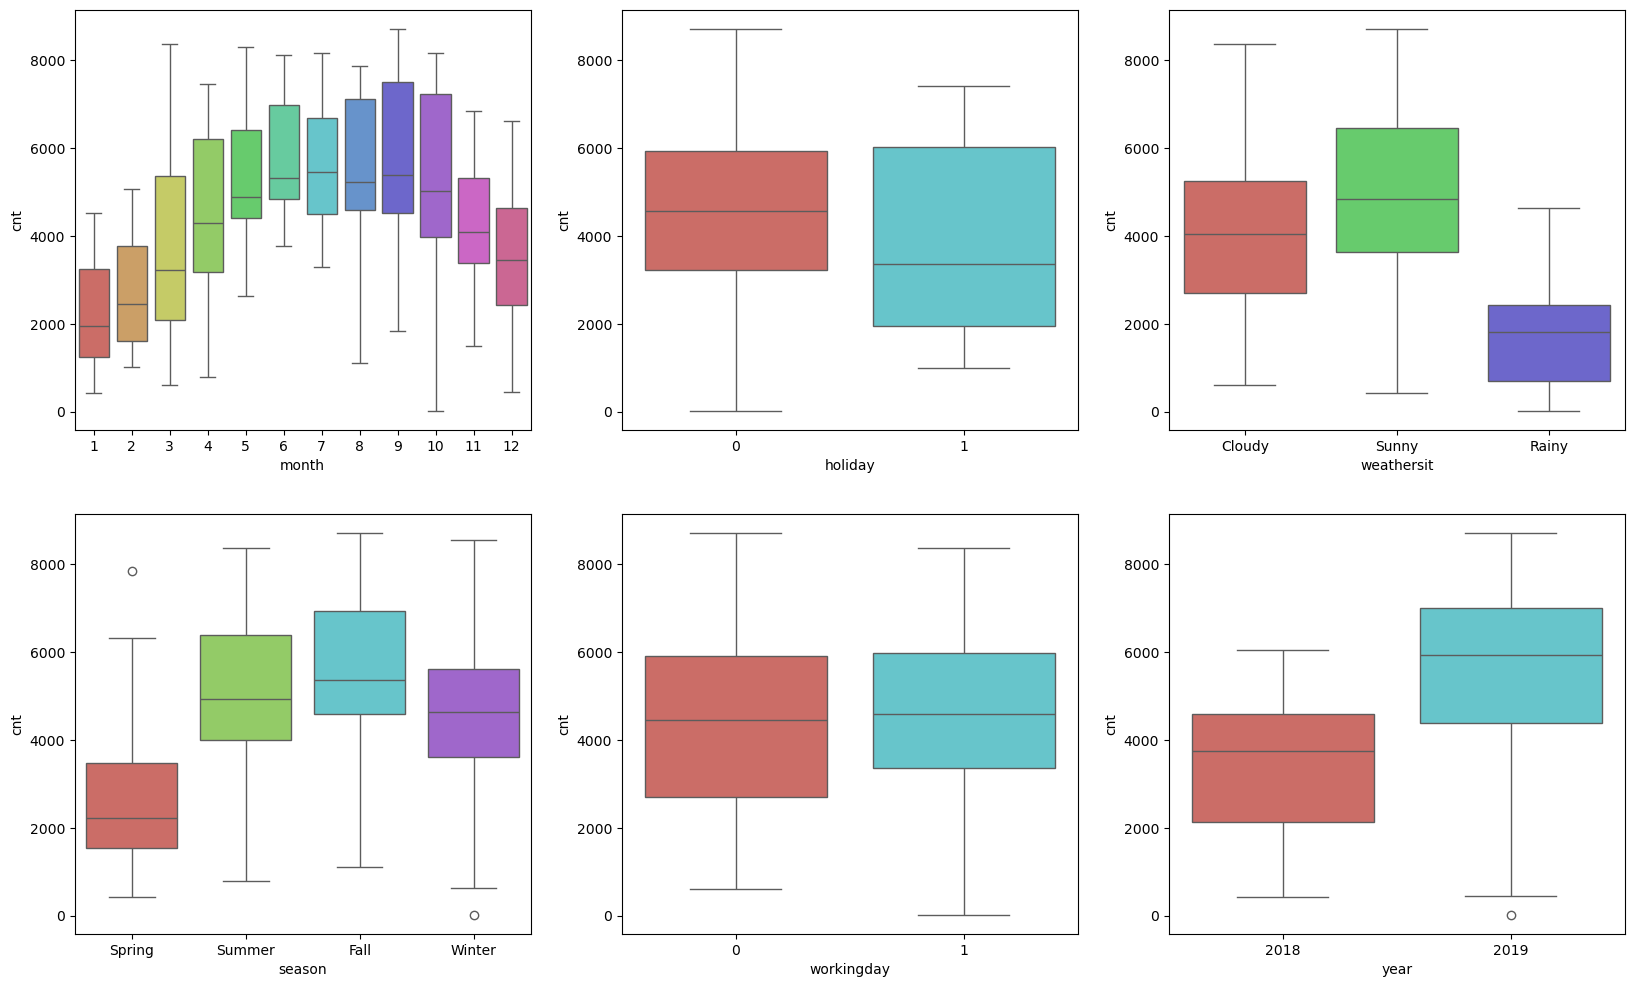

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='month',y='cnt',data=df,palette="hls")
plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=df,palette="hls")
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=df,palette="hls")
plt.subplot(2,3,4)
sns.boxplot(x='season',y='cnt',data=df,palette="hls")
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df,palette="hls")
plt.subplot(2,3,6)
sns.boxplot(x='year',y='cnt',data=df,palette="hls")
plt.show()

### Inferences
Months June to Sep see highest Bilke Rentals

Sunny sees highest rentals

2019 Sales were high compared to 2018


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    object 
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  year        730 non-null    int32  
 11  month       730 non-null    int32  
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 62.9+ KB


In [30]:
df.head(5)

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,Spring,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,Spring,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,Spring,0,1,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,Spring,0,2,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,Spring,0,3,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [31]:
season = pd.get_dummies(df['season'],dtype=int,drop_first=True,prefix='season')
mnth = pd.get_dummies(df['month'],dtype=int,drop_first=True,prefix='month')
weekday = pd.get_dummies(df['weekday'],dtype=int,drop_first=True,prefix='weekday')
weathersit = pd.get_dummies(df['weathersit'],dtype=int,drop_first=True,prefix='weathersit')


In [32]:
df = pd.concat([df,season,mnth,weekday,weathersit],axis=1)
df=df.drop(['season','month','weekday','weathersit'],axis=1)



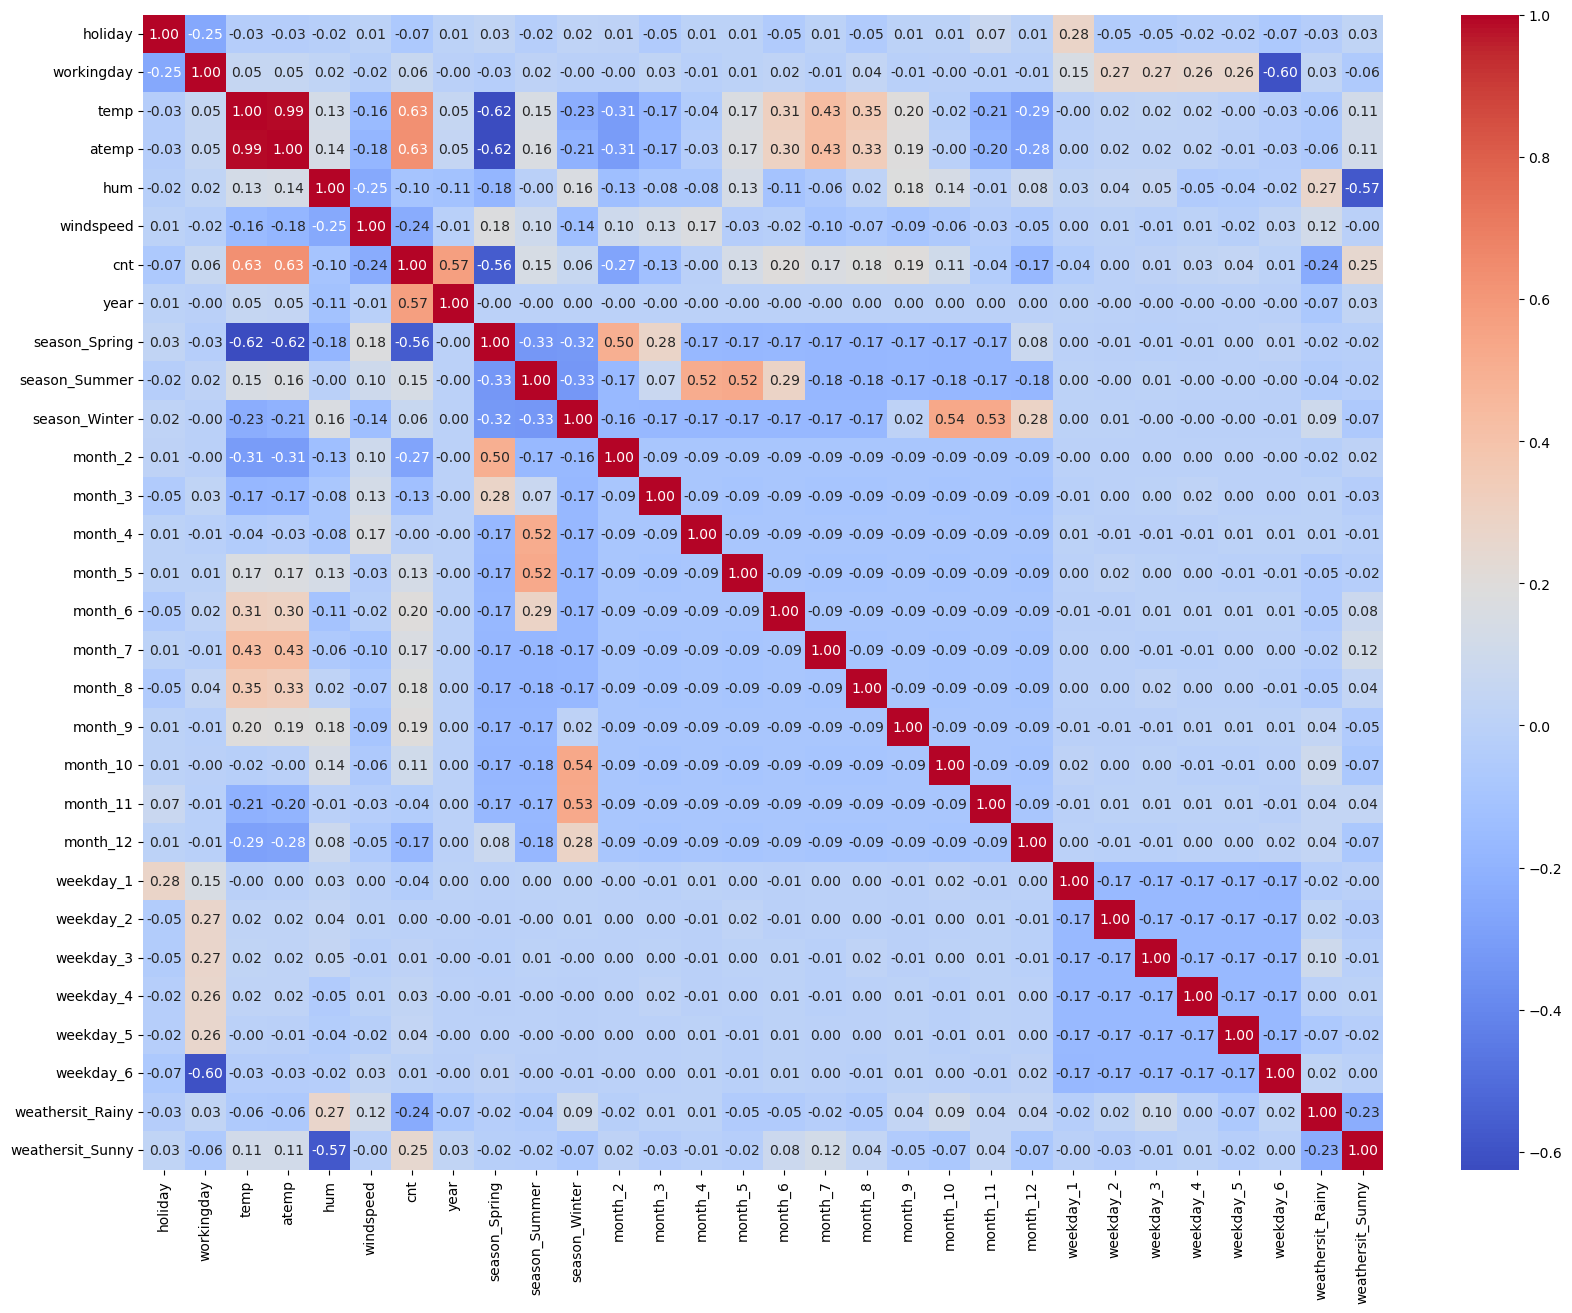

In [33]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True,fmt=".2f",cmap="coolwarm")
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           730 non-null    int64  
 1   workingday        730 non-null    int64  
 2   temp              730 non-null    float64
 3   atemp             730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   year              730 non-null    int32  
 8   season_Spring     730 non-null    int32  
 9   season_Summer     730 non-null    int32  
 10  season_Winter     730 non-null    int32  
 11  month_2           730 non-null    int32  
 12  month_3           730 non-null    int32  
 13  month_4           730 non-null    int32  
 14  month_5           730 non-null    int32  
 15  month_6           730 non-null    int32  
 16  month_7           730 non-null    int32  
 1

# <a name="model-building"></a>
## Model Building

In [35]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=70)

In [36]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [37]:

scaler = MinMaxScaler()
scaledvars = ['temp','atemp','hum','windspeed','cnt','year']
df_train[scaledvars] = scaler.fit_transform(df_train[scaledvars])

df_test[scaledvars] = scaler.transform(df_test[scaledvars])


In [38]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year,season_Spring,season_Summer,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Rainy,weathersit_Sunny
0,0,0,14.110847,18.18125,80.5833,10.749882,985,2018,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2018,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
X_train = df_train.drop('cnt',axis=1)
y_train= df_train['cnt']

### Feaure Select

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   holiday           730 non-null    int64  
 1   workingday        730 non-null    int64  
 2   temp              730 non-null    float64
 3   atemp             730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   year              730 non-null    int32  
 8   season_Spring     730 non-null    int32  
 9   season_Summer     730 non-null    int32  
 10  season_Winter     730 non-null    int32  
 11  month_2           730 non-null    int32  
 12  month_3           730 non-null    int32  
 13  month_4           730 non-null    int32  
 14  month_5           730 non-null    int32  
 15  month_6           730 non-null    int32  
 16  month_7           730 non-null    int32  
 1

In [42]:
# RFE Feature Ranking
pd.DataFrame({'Rank' : rfe.ranking_, 'Selected': rfe.support_, 'Feature' : X_train.columns}).sort_values(by='Rank',ascending=True)

,Rank,Selected,Feature
0,1,True,holiday
25,1,True,weekday_5
24,1,True,weekday_4
23,1,True,weekday_3
22,1,True,weekday_2
21,1,True,weekday_1
18,1,True,month_10
17,1,True,month_9
16,1,True,month_8
27,1,True,weathersit_Rainy


In [43]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'year',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_8', 'month_9',
       'month_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_Rainy', 'weathersit_Sunny'],
      dtype='object')

In [44]:
X_train_lm = X_train[selected_features]
X_train_lm.head()

,holiday,workingday,temp,atemp,hum,windspeed,year,season_Spring,season_Summer,season_Winter,month_8,month_9,month_10,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_Rainy,weathersit_Sunny
692,0,0,0.273137,0.233759,0.416024,0.730778,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1
127,0,0,0.584649,0.606003,0.649529,0.107707,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1
133,0,0,0.575304,0.580786,0.948586,0.232045,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0
524,0,0,0.812053,0.784325,0.449443,0.251294,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1
209,0,1,0.970925,0.973898,0.557841,0.312833,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [45]:

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())


const               0.215963
holiday            -0.021776
workingday          0.036458
temp                0.260888
atemp               0.169413
hum                -0.156487
windspeed          -0.135462
year                0.225961
season_Spring      -0.086667
season_Summer       0.032871
season_Winter       0.094953
month_2             0.010076
month_3             0.040207
month_4             0.019378
month_5             0.061354
month_6             0.033745
month_7            -0.003780
month_8             0.053042
month_9             0.108787
month_10            0.041966
month_11           -0.038599
month_12           -0.024811
weekday_1          -0.017460
weekday_2           0.002608
weekday_3           0.004062
weekday_4           0.010903
weekday_5           0.014569
weekday_6           0.034039
weathersit_Rainy   -0.182809
weathersit_Sunny    0.058992
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cn

In [46]:
# Rebuilding the model after dropping 'weekday_2'
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.215963
holiday            -0.019168
workingday          0.039066
temp                0.260888
atemp               0.169413
hum                -0.156487
windspeed          -0.135462
year                0.225961
season_Spring      -0.086667
season_Summer       0.032871
season_Winter       0.094953
month_2             0.010076
month_3             0.040207
month_4             0.019378
month_5             0.061354
month_6             0.033745
month_7            -0.003780
month_8             0.053042
month_9             0.108787
month_10            0.041966
month_11           -0.038599
month_12           -0.024811
weekday_1          -0.020067
weekday_3           0.001454
weekday_4           0.008295
weekday_5           0.011961
weekday_6           0.034039
weathersit_Rainy   -0.182809
weathersit_Sunny    0.058992
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:               

In [47]:
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.216083
holiday            -0.018395
workingday          0.039840
temp                0.261145
atemp               0.169205
hum                -0.156475
windspeed          -0.135429
year                0.225972
season_Spring      -0.086831
season_Summer       0.032831
season_Winter       0.094818
month_2             0.010038
month_3             0.040130
month_4             0.019202
month_5             0.061235
month_6             0.033632
month_7            -0.003992
month_8             0.052851
month_9             0.108656
month_10            0.041930
month_11           -0.038632
month_12           -0.024837
weekday_1          -0.020848
weekday_4           0.007506
weekday_5           0.011182
weekday_6           0.034023
weathersit_Rainy   -0.182566
weathersit_Sunny    0.059008
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:         

In [48]:
# Rebuilding the model after dropping 'month_7' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.214119
holiday            -0.018282
workingday          0.039943
temp                0.257998
atemp               0.169876
hum                -0.155911
windspeed          -0.135199
year                0.226048
season_Spring      -0.085278
season_Summer       0.033504
season_Winter       0.095753
month_2             0.010612
month_3             0.041298
month_4             0.021158
month_5             0.063513
month_6             0.036522
month_8             0.056204
month_9             0.111435
month_10            0.043630
month_11           -0.037253
month_12           -0.023842
weekday_1          -0.020855
weekday_4           0.007571
weekday_5           0.011163
weekday_6           0.034100
weathersit_Rainy   -0.182699
weathersit_Sunny    0.059053
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj.

In [49]:
# Rebuilding the model after dropping 'month_2' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.215656
holiday            -0.017700
workingday          0.039820
temp                0.253455
atemp               0.173747
hum                -0.156434
windspeed          -0.134442
year                0.226104
season_Spring      -0.082092
season_Summer       0.035150
season_Winter       0.097694
month_3             0.037446
month_4             0.018241
month_5             0.060902
month_6             0.034509
month_8             0.055443
month_9             0.109948
month_10            0.040568
month_11           -0.040504
month_12           -0.027539
weekday_1          -0.020792
weekday_4           0.007748
weekday_5           0.011254
weekday_6           0.033985
weathersit_Rainy   -0.182436
weathersit_Sunny    0.059057
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  

In [50]:
# Rebuilding the model after dropping 'weekday_4 ' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.216535
holiday            -0.014797
workingday          0.042553
temp                0.254107
atemp               0.173751
hum                -0.158120
windspeed          -0.134620
year                0.226197
season_Spring      -0.082223
season_Summer       0.034651
season_Winter       0.097355
month_3             0.038209
month_4             0.018963
month_5             0.061295
month_6             0.034888
month_8             0.055270
month_9             0.110572
month_10            0.040651
month_11           -0.039727
month_12           -0.026924
weekday_1          -0.023493
weekday_5           0.008467
weekday_6           0.033948
weathersit_Rainy   -0.182660
weathersit_Sunny    0.058713
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                

In [51]:
# Rebuilding the model after dropping 'holiday' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.214811
workingday          0.045548
temp                0.248044
atemp               0.177797
hum                -0.157318
windspeed          -0.133942
year                0.226293
season_Spring      -0.083125
season_Summer       0.034168
season_Winter       0.097931
month_3             0.038364
month_4             0.018826
month_5             0.061441
month_6             0.035594
month_8             0.055770
month_9             0.109967
month_10            0.039439
month_11           -0.042125
month_12           -0.027991
weekday_1          -0.026029
weekday_5           0.007594
weekday_6           0.036299
weathersit_Rainy   -0.182818
weathersit_Sunny    0.058955
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:

In [52]:
# Rebuilding the model after dropping 'weekday_5' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.216131
workingday          0.047035
temp                0.257023
atemp               0.168117
hum                -0.157589
windspeed          -0.134159
year                0.226304
season_Spring      -0.083524
season_Summer       0.033953
season_Winter       0.097275
month_3             0.038246
month_4             0.018786
month_5             0.061287
month_6             0.035593
month_8             0.055382
month_9             0.110037
month_10            0.040585
month_11           -0.041588
month_12           -0.027633
weekday_1          -0.027604
weekday_6           0.035992
weathersit_Rainy   -0.184416
weathersit_Sunny    0.058770
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.7
Da

In [53]:
# Rebuilding the model after dropping 'atemp' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.215690
workingday          0.046866
temp                0.424050
hum                -0.155342
windspeed          -0.141233
year                0.226392
season_Spring      -0.081179
season_Summer       0.035715
season_Winter       0.099803
month_3             0.038917
month_4             0.020616
month_5             0.061591
month_6             0.034658
month_8             0.052831
month_9             0.109790
month_10            0.041276
month_11           -0.040937
month_12           -0.027137
weekday_1          -0.026869
weekday_6           0.036390
weathersit_Rainy   -0.186005
weathersit_Sunny    0.059247
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 26 Au

In [54]:
# Rebuilding the model after dropping 'month4' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.217608
workingday          0.046496
temp                0.424709
hum                -0.155849
windspeed          -0.138335
year                0.226148
season_Spring      -0.082093
season_Summer       0.047191
season_Winter       0.099437
month_3             0.032132
month_5             0.047552
month_6             0.024081
month_8             0.050228
month_9             0.107379
month_10            0.039202
month_11           -0.043122
month_12           -0.028949
weekday_1          -0.027156
weekday_6           0.035964
weathersit_Rainy   -0.185962
weathersit_Sunny    0.059457
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 26 Aug 2024   Prob (F-statistic): 

In [55]:
# Rebuilding the model after dropping 'month_6' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.211769
workingday          0.047084
temp                0.444642
hum                -0.161318
windspeed          -0.142386
year                0.225918
season_Spring      -0.076552
season_Summer       0.055866
season_Winter       0.102295
month_3             0.028009
month_5             0.036816
month_8             0.044986
month_9             0.103716
month_10            0.036989
month_11           -0.042995
month_12           -0.028719
weekday_1          -0.027861
weekday_6           0.036957
weathersit_Rainy   -0.185528
weathersit_Sunny    0.058937
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          8.50e-186
Time:     

In [56]:
# Rebuilding the model after dropping 'month_10' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.212559
workingday          0.046524
temp                0.443157
hum                -0.155738
windspeed          -0.141112
year                0.226101
season_Spring      -0.077802
season_Summer       0.052467
season_Winter       0.122973
month_3             0.026233
month_5             0.036208
month_8             0.041407
month_9             0.093757
month_11           -0.067736
month_12           -0.045107
weekday_1          -0.027518
weekday_6           0.036749
weathersit_Rainy   -0.183885
weathersit_Sunny    0.059146
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.80e-186
Time:                        23:17:10  

In [57]:
# Rebuilding the model after dropping 'month_05' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.200618
workingday          0.046940
temp                0.450431
hum                -0.145148
windspeed          -0.144045
year                0.225953
season_Spring      -0.072664
season_Summer       0.065586
season_Winter       0.124844
month_3             0.021602
month_8             0.040913
month_9             0.093130
month_11           -0.066529
month_12           -0.045264
weekday_1          -0.028873
weekday_6           0.036638
weathersit_Rainy   -0.186722
weathersit_Sunny    0.059844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          9.98e-187
Time:                        23:17:10   Log-Likelihood:             

In [58]:
# Rebuilding the model after dropping 'month_03' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.204792
workingday          0.047720
temp                0.447671
hum                -0.148860
windspeed          -0.141983
year                0.225900
season_Spring      -0.069772
season_Summer       0.067638
season_Winter       0.124963
month_8             0.040772
month_9             0.092827
month_11           -0.068058
month_12           -0.048024
weekday_1          -0.029202
weekday_6           0.037021
weathersit_Rainy   -0.186024
weathersit_Sunny    0.059066
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.04e-187
Time:                        23:17:10   Log-Likelihood:                 505.11
No. Observations: 

In [59]:
# Rebuilding the model after dropping 'weekday_1' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.207632
workingday          0.046129
temp                0.450794
hum                -0.159119
windspeed          -0.147228
year                0.226154
season_Spring      -0.067486
season_Summer       0.069144
season_Winter       0.125668
month_8             0.041216
month_9             0.094657
month_11           -0.065617
month_12           -0.046773
weekday_6           0.040388
weathersit_Rainy   -0.182029
weathersit_Sunny    0.056845
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.63e-187
Time:                        23:17:10   Log-Likelihood:                 502.14
No. Observations:                 510   AIC:   

In [60]:
# Rebuilding the model after dropping 'month_8' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.222414
workingday          0.046919
temp                0.446458
hum                -0.151719
windspeed          -0.144631
year                0.227470
season_Spring      -0.086590
season_Summer       0.050789
season_Winter       0.109629
month_9             0.081035
month_11           -0.068531
month_12           -0.049174
weekday_6           0.040906
weathersit_Rainy   -0.187022
weathersit_Sunny    0.055822
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.41e-187
Time:                        23:17:10   Log-Likelihood:                 499.49
No. Observations:                 510   AIC:                            -969

In [61]:
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,21.54
1,temp,17.56
3,windspeed,5.74
5,season_Spring,4.64
0,workingday,4.53
7,season_Winter,3.71
13,weathersit_Sunny,3.68
6,season_Summer,2.57
4,year,2.04
9,month_11,1.81


In [62]:
# Rebuilding the model after dropping 'hum' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.114011
workingday          0.048240
temp                0.422797
windspeed          -0.112386
year                0.230859
season_Spring      -0.092165
season_Summer       0.046167
season_Winter       0.100365
month_9             0.072677
month_11           -0.069042
month_12           -0.054713
weekday_6           0.043616
weathersit_Rainy   -0.208677
weathersit_Sunny    0.081372
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          4.28e-185
Time:                        23:17:10   Log-Likelihood:                 491.38
No. Observations:                 510   AIC:                            -954.8
Df Residuals:             

In [63]:
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,6.75
2,windspeed,5.72
0,workingday,4.42
12,weathersit_Sunny,3.08
6,season_Winter,2.67
4,season_Spring,2.56
3,year,2.04
5,season_Summer,1.97
10,weekday_6,1.78
8,month_11,1.77


In [64]:
# Rebuilding the model after dropping 'temp' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['temp','hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.448972
workingday          0.050056
windspeed          -0.124346
year                0.242929
season_Spring      -0.300459
season_Summer      -0.041901
season_Winter      -0.019987
month_9             0.055547
month_11           -0.129346
month_12           -0.098210
weekday_6           0.035801
weathersit_Rainy   -0.224347
weathersit_Sunny    0.090084
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.23e-157
Time:                        23:17:10   Log-Likelihood:                 422.80
No. Observations:                 510   AIC:                            -819.6
Df Residuals:                     497   BIC:           

# Drastic Reduction in R2. Hence temp cannot be removed

In [65]:
# Rebuilding the model after dropping 'windspeed' 


X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['windspeed','hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lrmodel = lr.fit()
print (lrmodel.params)
print(lrmodel.summary())

const               0.077954
workingday          0.048133
temp                0.427847
year                0.231173
season_Spring      -0.099559
season_Summer       0.039197
season_Winter       0.102103
month_9             0.074526
month_11           -0.072897
month_12           -0.053221
weekday_6           0.040064
weathersit_Rainy   -0.226903
weathersit_Sunny    0.079839
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          1.31e-182
Time:                        23:17:10   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     497   BIC:           

In [66]:
X_train = df_train.drop(['cnt'],axis=1)
y_train= df_train['cnt']

dropping_cols = ['windspeed','hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,5.82
0,workingday,4.38
11,weathersit_Sunny,3.06
5,season_Winter,2.58
2,year,2.04
3,season_Spring,1.93
7,month_11,1.75
9,weekday_6,1.75
4,season_Summer,1.72
8,month_12,1.44


# There is no major decrease in R2 Scores. All P Values and VIF Scores are in acceptable range. We are keeping 'temp' as removing this is impacting R2 Score
['temp','month'] will be the two columns that will be dropped

<a name="residue-analysis"></a>
# Residual Analysis

R2Score for Train : 0.8302659878919656


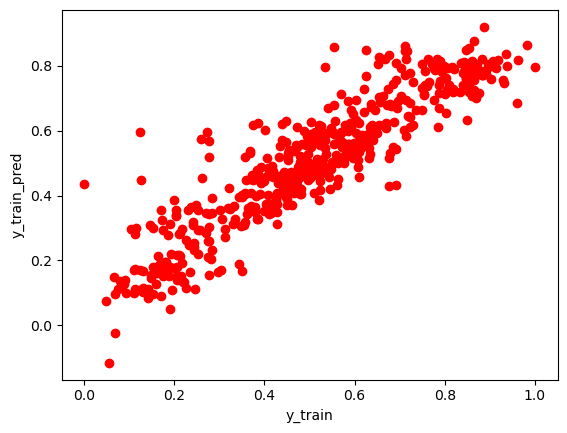

In [67]:
X_train = df_train.drop(['cnt'],axis=1)
y_train = df_train['cnt']

dropping_cols = ['windspeed','hum','weekday_2','weekday_3','month_7','month_2','weekday_4','holiday','weekday_5','atemp','month_4','month_6','month_10','month_5','month_3','weekday_1','month_8']

X_train = X_train.drop(dropping_cols,axis=1)

X_train_sm = sm.add_constant(X_train)
y_train_pred = lrmodel.predict(X_train_sm)

print ("R2Score for Train : " + str(r2_score(y_train,y_train_pred)))
plt.scatter(y_train, y_train_pred,color='r')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

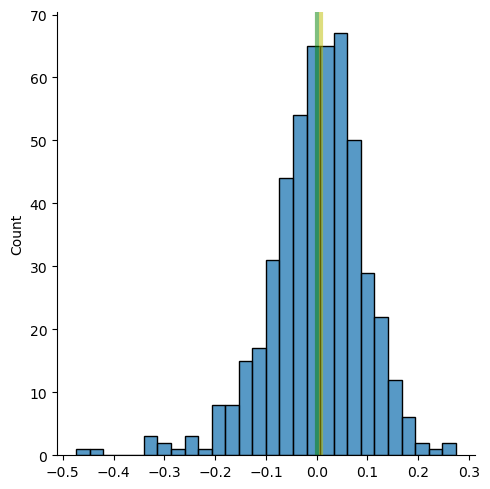

In [68]:
sns.displot(y_train-y_train_pred)
plt.axvline((y_train-y_train_pred).mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline((y_train-y_train_pred).median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.show()

### Mean of Residuals on Train Dataset is near Zero

# Predictions and Evaluations on the test set

R2Score for Test : 0.8108567601082517


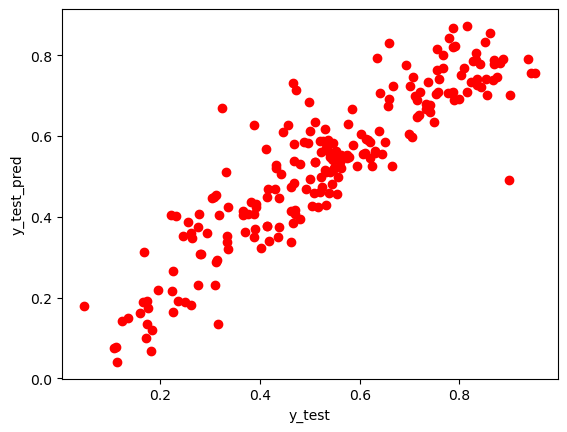

In [69]:
X_test = df_test.drop(['cnt'],axis=1)
y_test = df_test['cnt']


X_test = X_test.drop(dropping_cols,axis=1)

X_test_sm = sm.add_constant(X_test)
y_test_pred = lrmodel.predict(X_test_sm)

print ("R2Score for Test : " + str(r2_score(y_test,y_test_pred)))
plt.scatter(y_test, y_test_pred,color='r')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### The R2 Scores between and train and test are comparable

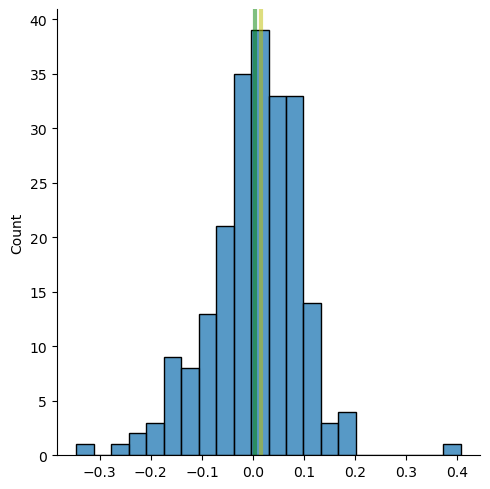

In [70]:
sns.displot(y_test-y_test_pred)
plt.axvline((y_test-y_test_pred).mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline((y_test-y_test_pred).median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.show()

### Mean of Residuals on Test Dataset is near Zero